# Preprocesamiento Machine Learning

## Importamos

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [251]:
df = pd.read_csv('main(out).csv')

## Label encoder

### Creamos diccionarios para cada variable a la que queremos aplicar el label encoder

In [252]:
diccionario_own_car_realty = {"Y": 1, "N": 0}
diccionario_gender = {"M": 1, "F": 0}

columns_to_encode = ["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CODE_GENDER"]
for i in columns_to_encode:
    if i != "CODE_GENDER":
        df[i] = df[i].map(diccionario_own_car_realty)
    else:
        df[i] = df[i].map(diccionario_gender)

In [253]:
diccionario_income = {"Working": 0, "State servant": 1, "Pensioner": 2, "Commercial associate": 3, "Unemployed": 4, "Student": 5}
diccionario_education = {"Higher education": 0, "Secondary / secondary special": 1, "Incomplete higher": 2, "Lower secondary": 3, "Academic degree": 4}
diccionario_housing = {"Rented apartment": 0, "House / apartment": 1, "Municipal apartment": 2, "With parents": 3, "Co-op apartment": 4, "Office apartment": 5}
diccionario_family = {"Single / not married": 0, "Married": 1, "Civil marriage": 2, "Separated": 3, "Widow": 4}
diccionario_ocupation = {"Laborers":0, "Medicine staff":1, "Sales staff": 2, "Security staff":3, "Core staff":4, "Drivers":5, "Accountants":6
                         , "Managers":7, "High skill tech staff":8, "Cleaning staff":9, "Private service staff":10, "Cooking staff":11
                         , "Low-skill Laborers":12, "Waiters/barmen staff":13, "HR staff":14, "Realty agents":15, "Secretaries":16, "IT staff": 17}

df["NAME_INCOME_TYPE"] = df["NAME_INCOME_TYPE"].map(diccionario_income)
df["NAME_EDUCATION_TYPE"] = df["NAME_EDUCATION_TYPE"].map(diccionario_education)
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].map(diccionario_ocupation)
df["NAME_HOUSING_TYPE"] = df["NAME_HOUSING_TYPE"].map(diccionario_housing)
df["NAME_FAMILY_STATUS"] = df["NAME_FAMILY_STATUS"].map(diccionario_family)

In [254]:
df["STATUS"].value_counts()

STATUS
0    32127
X    19742
C    18049
1     4180
2      555
3      248
4      181
5      180
Name: count, dtype: int64

In [255]:
diccionario_STATUS = {"C": -1, "X": -2, "0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5}
df["STATUS"] = df["STATUS"].map(diccionario_STATUS)
df["STATUS"] = df["STATUS"].astype(int)
df["STATUS"].value_counts()

STATUS
 0    32127
-2    19742
-1    18049
 1     4180
 2      555
 3      248
 4      181
 5      180
Name: count, dtype: int64

In [256]:
df.head()

,ID,ADDRESS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,STATUS,MONTHS_BALANCE
0,5008804,"06042, CT, 31 Mitchell Road",1,1,1,0,225000.0,0,0,2,...,1,1,0,0,0,2,1990-09-04,L,0,1
1,5008804,"06042, CT, 31 Mitchell Road",1,1,1,0,225000.0,0,0,2,...,1,1,0,0,0,2,1990-09-04,L,1,1
2,5008804,"06042, CT, 31 Mitchell Road",1,1,1,0,225000.0,0,0,2,...,1,1,0,0,0,2,1990-09-04,L,-1,13
3,5008804,"06042, CT, 31 Mitchell Road",1,1,1,0,225000.0,0,0,2,...,1,1,0,0,0,2,1990-09-04,L,-2,1
4,5008804,"06042, CT, 31 Mitchell Road",0,0,1,1,90000.0,1,1,1,...,1,0,0,0,1,3,1984-07-06,L,0,1


## Normalizamos variables

### Los modelos por norma general funcionan mejor al normalizar las variables continuas, así que normalizamos AMT_INCOME_TOTAL y DAYS_EMPLOYED

In [257]:
columns_to_normalize=["AMT_INCOME_TOTAL", "DAYS_EMPLOYED"]

for i in columns_to_normalize:
    df[i] = (df[i] - df[i].mean()) / df[i].std()

## Eliminamos columnas inútiles

### El modelo sólo soporta valores numéricos así que eliminamos las variables a las que no tiene sentido hacer un label encoder. Además, aprovechamos para eliminar la columna ID que no aporta nada a la hora de predecir

In [258]:
df.drop(columns=["ADDRESS", "Letter", "DAYS_BIRTH_CLEAN", "ID"], inplace=True)

In [259]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,MONTHS_BALANCE
0,1,1,1,0,0.712033,0,0,2,0,0.418516,1,1,0,0,0,2,0,1
1,1,1,1,0,0.712033,0,0,2,0,0.418516,1,1,0,0,0,2,1,1
2,1,1,1,0,0.712033,0,0,2,0,0.418516,1,1,0,0,0,2,-1,13
3,1,1,1,0,0.712033,0,0,2,0,0.418516,1,1,0,0,0,2,-2,1
4,0,0,1,1,-1.223188,1,1,1,1,0.085817,1,0,0,0,1,3,0,1


## Entrenamos y ejecutamos el modelo

In [261]:
X, y = df.drop(columns={"STATUS"}, axis=1), df['STATUS'] # Nuestra variable objetivo es STATUS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

### Observamos que el modelo tiene un accuracy de 0.6, por lo que es demasiado bajo

In [262]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_preds = RFC.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          -2       0.60      0.56      0.58      4986
          -1       0.58      0.52      0.55      4574
           0       0.63      0.72      0.67      7972
           1       0.43      0.29      0.35       975
           2       0.25      0.17      0.20       146
           3       0.08      0.08      0.08        61
           4       0.09      0.06      0.07        52
           5       0.38      0.16      0.23        50

    accuracy                           0.60     18816
   macro avg       0.38      0.32      0.34     18816
weighted avg       0.59      0.60      0.59     18816



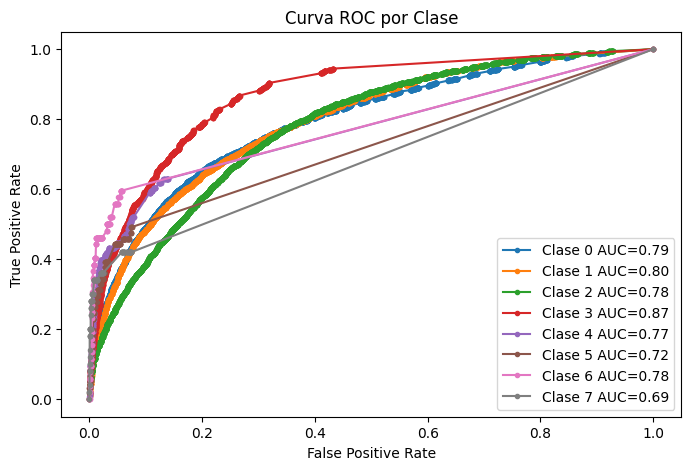

In [284]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que y_test es multiclase, binarizamos las etiquetas
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Predecimos probabilidades para cada clase
y_pred_prob = RFC.predict_proba(X_test)

# Calculamos AUC y dibujamos la curva ROC para cada clase
plt.figure(figsize=(8, 5))

for i in range(y_test_binarized.shape[1]):  # Iteramos sobre cada clase
    # Calculamos la curva ROC y AUC para la clase i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])
    
    # Dibujamos la curva ROC para la clase i
    plt.plot(fpr, tpr, marker='.', label=f'Clase {i} AUC={auc:.2f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC por Clase')
plt.legend()
plt.show()

## Conclusiones

### El modelo que hemos entrenado no nos permite predecir con exactitud el estado de la cuenta anterior del cliente, por lo que ofrecer un fraccionamiento de prima gratuito en base a este podría no dar los resultados esperados.